#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sympy as sp

In [3]:
n = 10*(5+9)-5*9
n

95

In [4]:
data = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\VU\My VU\P1\Stoch Proc\SP500 (1).csv", parse_dates = True)
data

,DATE,SP500
0,01-10-2014,2018.05
1,01-11-2014,2067.56
2,01-12-2014,2058.90
3,01-01-2015,1994.99
4,01-02-2015,2104.50
...,...,...
114,01-04-2024,5035.69
115,01-05-2024,5277.51
116,01-06-2024,5460.48
117,01-07-2024,5522.30


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format = "%d-%m-%Y")
data = data.set_index("DATE")
data = data.sort_index(ascending = False)
data = data[:n]

In [6]:
data.head()

,SP500
DATE,
2024-08-01,5648.40
2024-07-01,5522.30
2024-06-01,5460.48
2024-05-01,5277.51
2024-04-01,5035.69


In [7]:
returns = data['SP500'].pct_change(-1)

In [8]:
returns

DATE
2024-08-01    0.022835
2024-07-01    0.011321
2024-06-01    0.034670
2024-05-01    0.048021
2024-04-01   -0.041615
                ...   
2017-02-01    0.037198
2017-01-01    0.017884
2016-12-01    0.018201
2016-11-01    0.034174
2016-10-01         NaN
Name: SP500, Length: 95, dtype: float64

In [9]:
mean = returns.dropna().mean()
std_dev = returns.dropna().std()

In [10]:
print("Mean:", np.round(mean,3))
print("Std Dev:", np.round(std_dev,5))

Mean: 0.012
Std Dev: 0.0466


## Part a)

In [12]:
import statsmodels.api as sm

In [13]:
Y = returns.dropna()
X = pd.Series(mean, index=range(len(Y)))

In [14]:
X.index = Y.index

In [15]:
model = sm.OLS(Y,X)
results = model.fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Sep 2024   Prob (F-statistic):                nan
Time:                        21:31:20   Log-Likelihood:                 155.34
No. Observations:                  94   AIC:                            -308.7
Df Residuals:                      93   BIC:                            -306.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.417      2.399      0.0

## Part b)

In [18]:
# Confidence interval for mu is given as [0.035,0.045]
# Given --- mu = 0.04 and sigma = 0.06

In [19]:
mu = 0.004
sigma = 0.06
z = 1.96 # 95% confidence interval
N = ((sigma*z)/(0.0045 - mu))**2
print("Years of Data required: ", N/12)

Years of Data required:  4609.920000000007


#### This is because the confidence interval for 95% significance is very near to the mean or narrow

## Part c)

In [22]:
mu = 0.004
sigma = 0.06
n = N

In [23]:
s = np.random.normal(mu, sigma, int(np.round(n,0)))

In [24]:
d = sigma*s + mu

In [25]:
len(d)

55319

In [26]:
Y = d
X = pd.Series(mu, index=range(len(Y)))

In [27]:
model = sm.OLS(Y,X)
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Sep 2024   Prob (F-statistic):                nan
Time:                        21:31:20   Log-Likelihood:             2.3314e+05
No. Observations:               55319   AIC:                        -4.663e+05
Df Residuals:                   55318   BIC:                        -4.663e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0605      0.004    278.960      0.0

###

### Part d)

In [31]:
data_d = data.copy()

In [32]:
data_d['Log Ret'] = np.log(data_d/data_d.shift(-1))
data_d = data_d.dropna()

In [33]:
data_d.head()

,SP500,Log Ret
DATE,,
2024-08-01,5648.40,0.022578
2024-07-01,5522.30,0.011258
2024-06-01,5460.48,0.034082
2024-05-01,5277.51,0.046904
2024-04-01,5035.69,-0.042506


In [34]:
# We use log returns because this model assumes continuous compounded returns

In [35]:
print("Mu:", np.round(data_d['Log Ret'].mean(),3))
print("Sigma:", np.round(data_d['Log Ret'].std(),3))

Mu: 0.01
Sigma: 0.047


###

### Part e)
#### The expected value after derivation will look like

$$
E[S_{60}] = S_{0} \cdot \exp\left(60 \cdot \left( \tilde{\mu} - \frac{1}{2} \tilde{\sigma}^2 \right)\right)
$$


In [39]:
S_0 = data_d['SP500'].iloc[0]
Exp_v = S_0 * np.exp(60 * (data_d['Log Ret'].mean() - 0.5 * (data_d['Log Ret'].std() ** 2)))
print("Expected value of S&P-500 after 5 years(60 months):", np.round(Exp_v, 2))

Expected value of S&P-500 after 5 years(60 months): 9869.28


### Part  f)

In [41]:
mu = np.round(data_d['Log Ret'].mean(),3)
sigma = np.round(data_d['Log Ret'].std(),3)
np.set_printoptions(suppress=True, precision=2, floatmode='fixed')

In [42]:
e = np.random.normal(mu, sigma, (61, 10000))

In [43]:
df = np.ones((61,10000))
df[0] = data_d['SP500'].iloc[0]

In [44]:
df

array([[5648.40, 5648.40, 5648.40, ..., 5648.40, 5648.40, 5648.40],
       [   1.00,    1.00,    1.00, ...,    1.00,    1.00,    1.00],
       [   1.00,    1.00,    1.00, ...,    1.00,    1.00,    1.00],
       ...,
       [   1.00,    1.00,    1.00, ...,    1.00,    1.00,    1.00],
       [   1.00,    1.00,    1.00, ...,    1.00,    1.00,    1.00],
       [   1.00,    1.00,    1.00, ...,    1.00,    1.00,    1.00]])

In [45]:
df.shape

(61, 10000)

In [46]:
for i in range(1,len(df)):
    df[i] = df[i-1]* np.exp((mu - 0.5 * sigma**2) + sigma*e[i])

In [47]:
df = pd.DataFrame(df, columns = ["Sim_" + str(i) for i in range(1,10001)])
df.head()

,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Sim_6,Sim_7,Sim_8,Sim_9,Sim_10,...,Sim_9991,Sim_9992,Sim_9993,Sim_9994,Sim_9995,Sim_9996,Sim_9997,Sim_9998,Sim_9999,Sim_10000
0,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,...,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000
1,5671.413873,5702.558206,5721.472593,5703.892626,5698.622447,5714.840846,5733.298726,5723.201834,5685.077538,5688.721973,...,5691.190604,5710.497318,5687.402411,5709.723782,5674.088247,5709.441461,5698.293868,5682.816670,5705.926256,5711.950709
2,5744.222290,5748.203553,5740.286515,5753.004599,5747.653560,5774.509807,5770.594454,5771.409108,5742.546941,5740.715103,...,5711.174618,5765.974474,5744.634760,5787.506928,5730.645205,5760.832275,5743.630745,5708.858921,5757.571885,5764.682909
3,5815.029343,5812.650509,5809.760881,5792.774082,5805.182379,5838.389818,5825.013696,5845.859204,5801.777401,5795.215955,...,5780.167681,5815.418792,5812.598061,5841.235577,5776.227798,5816.231769,5803.835634,5758.857678,5809.619979,5829.429237
4,5859.217262,5874.361465,5830.944250,5835.965923,5853.374074,5887.737381,5875.992545,5900.216417,5852.607553,5873.886615,...,5821.579264,5874.813016,5864.839565,5921.240310,5829.551284,5877.792149,5881.321495,5803.959157,5862.570309,5889.496325


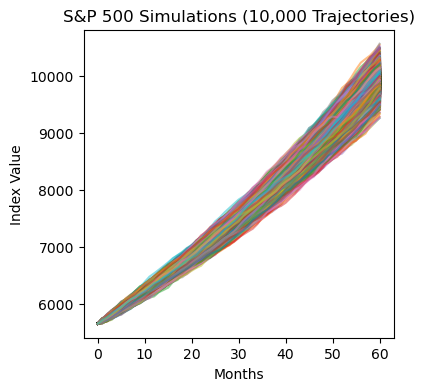

In [48]:
import matplotlib.pyplot as plt

# Create a plot with 10,000 simulations
plt.figure(figsize=(4, 4))

# Plot each simulation (each column in the DataFrame)
for col in df.columns:
    plt.plot(df.index, df[col], alpha=0.5)  # Adjust alpha for better visualization

# Add title and labels
plt.title('S&P 500 Simulations (10,000 Trajectories)')
plt.xlabel('Months')
plt.ylabel('Index Value')

# Show the plot
plt.show()


In [49]:
End_values = np.array(df.iloc[60])

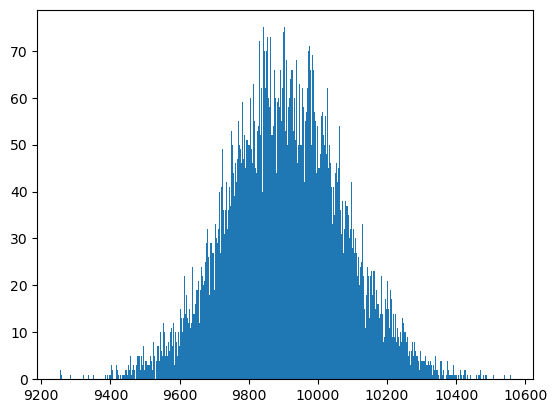

In [50]:
plt.hist(End_values, bins = 500)
plt.show()

### Part f)

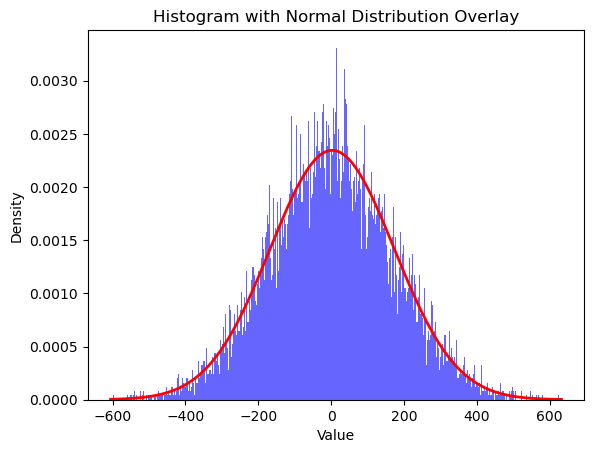

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Generate random numbers from a normal distribution
mean = np.mean(End_values)
sigma = np.std(End_values)
random_data = np.random.normal(mu, sigma, 10000)

# Step 2: Plot the histogram of the random data
plt.hist(random_data, bins=500, density=True, alpha=0.6, color='blue')

# Step 3: Fit a normal distribution to the random data (estimate mean and standard deviation)
mean, std_dev = np.mean(random_data), np.std(random_data)

# Step 4: Generate x values for the normal distribution curve (from min to max of random data)
x = np.linspace(min(random_data), max(random_data), 1000)

# Step 5: Generate y values for the normal distribution curve using the fitted mean and std_dev
y = norm.pdf(x, mean, std_dev)

# Step 6: Plot the normal distribution curve
plt.plot(x, y, 'r-', lw=2)  # 'r-' is for a red line, lw=2 sets the line width

# Add labels and title
plt.title('Histogram with Normal Distribution Overlay')
plt.xlabel('Value')
plt.ylabel('Density')

# Step 7: Show the plot
plt.show()


In [53]:
from scipy.stats import kurtosis, skew

# Assuming End_values is your data (as a NumPy array or pandas Series)
kurtosis_value = kurtosis(End_values)
skewness_value = skew(End_values)

# Print the results
print("Kurtosis of End_values:", np.round(kurtosis_value,1))
print("Skewness of End_values:", np.round(skewness_value,1))

Kurtosis of End_values: 0.1
Skewness of End_values: 0.1


In [54]:
from scipy.stats import kurtosis, skew

# Assuming End_values is your data (as a NumPy array or pandas Series)
kurtosis_value = kurtosis(random_data)
skewness_value = skew(random_data)

# Print the results
print("Kurtosis of End_values:", np.round(kurtosis_value,0))
print("Skewness of End_values:", np.round(skewness_value,0))

Kurtosis of End_values: 0.0
Skewness of End_values: 0.0


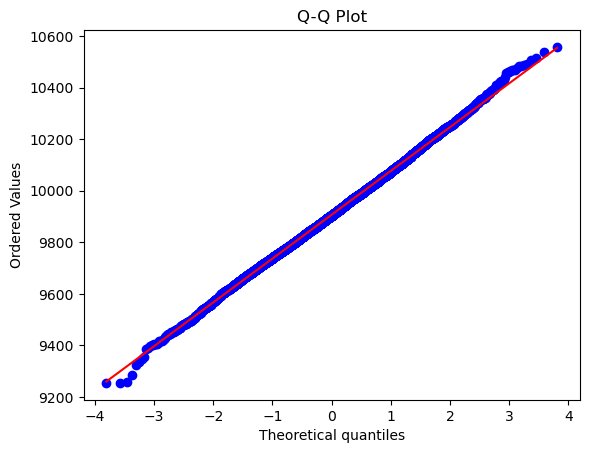

In [55]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for normality check
stats.probplot(End_values, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


### Part g)

In [57]:
mu = 0
sigma = np.round(data_d['Log Ret'].std(),3)
np.set_printoptions(suppress=True, precision=2, floatmode='fixed')

In [58]:
e = np.random.normal(mu, sigma, (61, 10000))
df = np.ones((61,10000))
df[0] = data_d['SP500'].iloc[0]
for i in range(1,len(df)):
    df[i] = df[i-1]* np.exp((mu - 0.5 * sigma**2) + sigma*e[i])

df = pd.DataFrame(df, columns = ["Sim_" + str(i) for i in range(1,10001)])
df.head()

,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Sim_6,Sim_7,Sim_8,Sim_9,Sim_10,...,Sim_9991,Sim_9992,Sim_9993,Sim_9994,Sim_9995,Sim_9996,Sim_9997,Sim_9998,Sim_9999,Sim_10000
0,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,...,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000,5648.400000
1,5645.926853,5642.333229,5635.853220,5627.328653,5647.627390,5634.375901,5646.372857,5653.789116,5668.107517,5648.709362,...,5651.500215,5640.614293,5636.947560,5650.173146,5640.805098,5637.204738,5629.206348,5624.171281,5623.394544,5652.602446
2,5643.013460,5645.174767,5622.157383,5641.327956,5642.944974,5615.666601,5655.060298,5650.346571,5639.556418,5629.716627,...,5641.884768,5617.350560,5613.494225,5647.405608,5630.118018,5637.241342,5629.145561,5609.498593,5621.956033,5633.770924
3,5644.482528,5636.801878,5617.673077,5644.509420,5635.079521,5607.200860,5648.719824,5639.467622,5632.516268,5618.517384,...,5632.742004,5618.290417,5605.429071,5663.874694,5621.509256,5636.677372,5634.827724,5599.177205,5616.045249,5616.778379
4,5640.730075,5630.345691,5632.115696,5624.848606,5633.417682,5607.040570,5670.724826,5635.807460,5617.200587,5609.418588,...,5632.724137,5621.435471,5580.595070,5635.853133,5627.240826,5627.366065,5624.738981,5586.402954,5607.655635,5616.688562


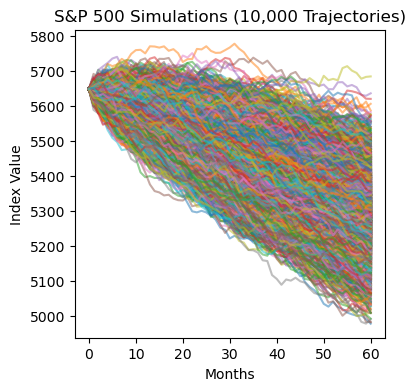

In [59]:
import matplotlib.pyplot as plt

# Create a plot with 10,000 simulations
plt.figure(figsize=(4, 4))

# Plot each simulation (each column in the DataFrame)
for col in df.columns:
    plt.plot(df.index, df[col], alpha=0.5)  # Adjust alpha for better visualization

# Add title and labels
plt.title('S&P 500 Simulations (10,000 Trajectories)')
plt.xlabel('Months')
plt.ylabel('Index Value')

# Show the plot
plt.show()


In [60]:
End_values = np.array(df.iloc[60])

In [61]:
q_u = np.sum(End_values > 5600)/len(End_values)
q_d = np.sum(End_values < 5600)/ len(End_values)

In [62]:
Price_DP = q_u*(0) + q_d*1

In [63]:
Price_DP

0.9996

## Part 2

## Constructing Binomial Tree

#### Calculating u and d using the Expected value and Variance equation

In [3]:
def calculate_u_d(steps):
    # Define symbols
    r_u, r_d = sp.symbols('r_u r_d')
    
    # Monthly expected return and variance
    monthly_return = 0.006
    monthly_variance = 0.047**2
    
    # Adjust return and variance based on steps
    adjusted_return = monthly_return * (3 / steps)
    adjusted_variance = monthly_variance * (3 / steps)
    
    # Define the two equations
    expected_return_eq = 0.56 * r_u + 0.44 * r_d - adjusted_return  # Expected return equation
    variance_eq = 0.56 * (r_u - adjusted_return)**2 + 0.44 * (r_d - adjusted_return)**2 - adjusted_variance  # Variance equation
    
    # Solve the system of equations
    solution_discrete = sp.solve([expected_return_eq, variance_eq], (r_u, r_d))
    
    # Calculate u and d from the returns
    u_1 = np.round(float(1 + solution_discrete[0][0]), 5)  # First set (u and d)
    d_1 = np.round(float(1 + solution_discrete[0][1]), 5)
    
    return u_1, d_1

u_1, d_1 = calculate_u_d(3)
print("u:", u_1)
print("d:", d_1)

u: 1.04766
d: 0.95298


#### Calculation Risk neutral probabilities

In [5]:
r = 0.04
u = u_1 
d = d_1

# Using the formulas provided for risk-neutral probabilities
R = r/12 # Risk-free rate per month

# Calculate q_u and q_d
q_u = np.round(((1 + R) - d) / (u - d),4)
q_d = np.round((u - (1 + R)) / (u - d),4)

q_u, q_d


(0.5318, 0.4682)

#### Part a)

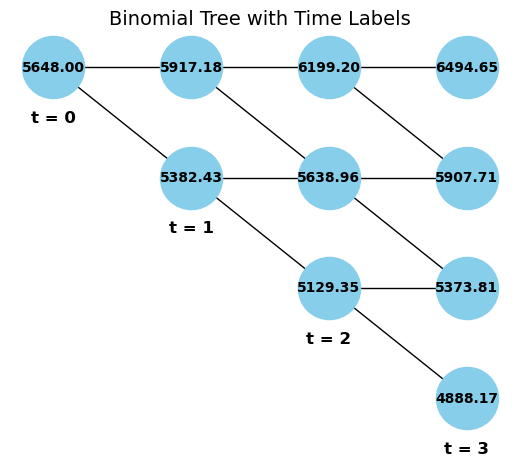

Stock Price Binomial Tree:
[[5648.         5917.18368    6199.19665419 6494.65036673]
 [   0.         5382.43104    5638.95770337 5907.71042751]
 [   0.            0.         5129.3491325  5373.81391215]
 [   0.            0.            0.         4888.16713629]]


In [8]:
# Visualization function
def visualize_binomial_tree(stock_tree, time_labels):
    G = nx.DiGraph()
    
    # Create edges with labels
    for i in range(stock_tree.shape[1]):
        for j in range(i + 1):
            G.add_node(f'{i},{j}', label=f'{stock_tree[j, i]:.2f}')
            if i < stock_tree.shape[1] - 1:
                G.add_edge(f'{i},{j}', f'{i+1},{j}', weight='U')  # Up move
                G.add_edge(f'{i},{j}', f'{i+1},{j+1}', weight='D')  # Down move
    
    # Create positions for the nodes
    pos = {}
    for i in range(stock_tree.shape[1]):
        for j in range(i + 1):
            pos[f'{i},{j}'] = (i, -j)  # Layout the nodes in a triangular pattern
    
    labels = nx.get_node_attributes(G, 'label')
    
    # Draw the graph
    plt.figure(figsize=(5, 4))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=False)
    
    # Add time labels
    for i in range(stock_tree.shape[1]):
        plt.text(i, -i - 0.5, f't = {time_labels[i]}', horizontalalignment='center', fontsize=12, fontweight='bold')
    
    plt.title("Binomial Tree with Time Labels", size=14)
    plt.show()

# Function to generate binomial tree using the calculated u and d values
def generate_binomial_tree(S0, u, d, N, output = "graph"):
    
    # Initialize the binomial tree
    stock_tree = np.zeros((N + 1, N + 1))
    
    # Fill the tree with stock prices
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)
    
    # Output options
    if output == "graph" or output == "both":
        visualize_binomial_tree(stock_tree, [i for i in range(N + 1)])
    
    if output == "tree" or output == "both":
        print("Stock Price Binomial Tree:")
        print(stock_tree)

# Example input values
S0 = 5648  # Initial S&P-500 index level
u = u_1 # Calculated upward factor
d = d_1  # Calculated downward factor
N = 3  # Number of time steps (3 months)

# Generate and visualize the binomial tree
generate_binomial_tree(S0, u, d, N, output="both")


### Part b)

#### 3 month Call Option Price

In [10]:
# Parameters
S0 = 5648 
K = 5600  
r = 0.04  
N = 3  # Number of steps
u, d = calculate_u_d(3)

R = (r*0.25)/N # Monthly Rate

# Step 1: Initialize the stock price tree
stock_tree = np.zeros((N + 1, N + 1))

# Step 2: Fill the stock price tree
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

# Step 3: Initialize the option price tree
option_tree = np.zeros((N + 1, N + 1))

# Step 4: Calculate the option payoff at maturity (t = N)
for j in range(N + 1):
    option_tree[j, N] = max(stock_tree[j, N] - K, 0)  # Payoff at maturity

# Step 5: Backward induction to calculate option price at earlier nodes
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)

# The option price at the root of the tree (at t = 0)
option_price_at_t0 = option_tree[0, 0]
print("Price of 3-month European Call Option is", np.round(option_price_at_t0,4))


Price of 3-month European Call Option is 254.2375


In [12]:
option_tree

array([[254.23754153, 403.55520318, 617.78580118, 894.65036673],
       [  0.        ,  86.44669574, 163.09674952, 307.71042751],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [14]:
stock_tree

array([[5648.        , 5917.18368   , 6199.19665419, 6494.65036673],
       [   0.        , 5382.43104   , 5638.95770337, 5907.71042751],
       [   0.        ,    0.        , 5129.3491325 , 5373.81391215],
       [   0.        ,    0.        ,    0.        , 4888.16713629]])

### Part c)

In [16]:
from scipy.stats import norm

def black_scholes(S0, K, r, T, sigma, option_type):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "Call":
        option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "Put":
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Please input 'Call' or 'Put'.")
    
    return option_price

# Parameters
S0 = 5648
K = 5600 
T = 3 / 12 
r = 0.04 
sigma_monthly = 0.047
sigma_annual = sigma_monthly * np.sqrt(12)

# Calculate the Black-Scholes price
bs_call_price = black_scholes(S0, K, r, T, sigma_annual,'Call')
print(f"The Black-Scholes price of the European call option is", np.round(bs_call_price,4))


The Black-Scholes price of the European call option is 238.2395


In [18]:
print("Price of CE using Binomial Model:", np.round(option_price_at_t0,3))
print("Price of CE using BSM Model:", np.round(bs_call_price,3))

Price of CE using Binomial Model: 254.238
Price of CE using BSM Model: 238.24


### Part d)

In [20]:
def price_european_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
   
    #R = r * delta_t 
    R = (r*0.25)/N
    if q_u is None:  
        q_u = np.round((1 + R - d) / (u - d),4)
    if q_d is None: 
        q_d = np.round(1 - q_u,4)

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(stock_tree[j, N] - K, 0)  # Payoff at maturity

    # Backward induction to calculate option price at earlier nodes
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0


In [ ]:
# # Parameters
# S0 = 5648 
# K = 5600  
# r = 0.04  
# N = 3  # Number of steps
# u, d = calculate_u_d(3)
# stock_tree, option_tree, option_price_at_t0 = price_european_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
# np.round(option_price_at_t0,3)

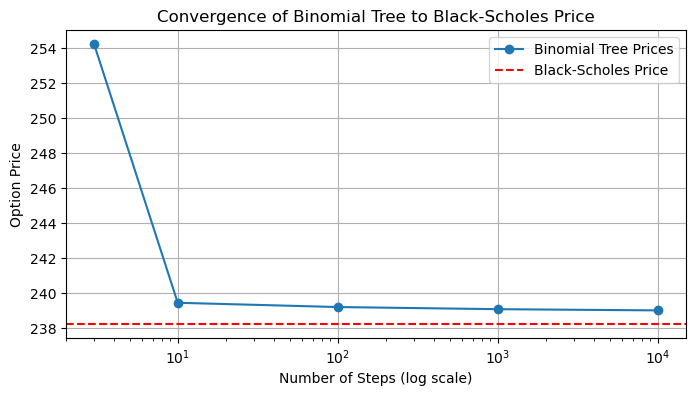

In [24]:
# Given parameters
S0 = 5648  # Initial stock price
K = 5600   # Strike price
r = 0.04   # Annual risk-free rate
T = 3 / 12  # 3 months = 0.25 years
sigma = 0.047 * np.sqrt(12)  # Annual volatility

# Calculate Black-Scholes option price
bs_option_price = black_scholes(S0, K, r, T, sigma, 'Call')

# Step sizes and binomial tree calculations
steps = [3, 10, 100, 1000, 10000]  # Number of steps to try
binomial_prices_call = []
for N in steps:
    #delta_t = T / N  # Adjust delta_t for each N steps
    u, d = calculate_u_d(N)
    stock_tree, option_tree, price = price_european_call_binomial(S0, K, r, u, d, N)
    binomial_prices_call.append(price)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(steps, binomial_prices_call, label="Binomial Tree Prices", marker='o')
plt.axhline(y=bs_option_price, color='r', linestyle='--', label="Black-Scholes Price")
plt.xscale('log')  # Log scale for better visualization of convergence
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Tree to Black-Scholes Price')
plt.legend()
plt.grid(True)
plt.show()

### Part e)

In [ ]:
option_tree_10000 = pd.DataFrame(option_tree)

In [ ]:
option_tree_10000.columns = ['Sim_'+str(i) for i in range(0,len(option_tree_10000))]

In [ ]:
# Given parameters
N = 10000
S0 = 5648  
K = 5600  
r = 0.04  
T = 3 / 12  
sigma = 0.047*np.sqrt(12)  
u, d = calculate_u_d(N)
q_u = 0.56
q_d = 1 - q_u
stock_tree, option_tree, price = price_european_call_binomial(S0, K, r, delta_t, u, d, N, q_u, q_d)

In [ ]:
option_tree_10000_2 = pd.DataFrame(option_tree)
option_tree_10000_2.columns = ['Sim_'+str(i) for i in range(0,len(option_tree_10000))]
plt.hist(list(np.round(option_tree_10000_2['Sim_10000'],3)), bins = 20)
plt.title(['Option Values using real world probabilities'])
plt.show()

### Part f)

In [125]:
def price_european_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
    # Adjust the rate R as in the call option function
    R = (r * 0.25) / N  # Discrete rate per step, adjusted for N steps
    if q_u is None:  # Risk-neutral probability for upward move
        q_u = np.round((1 + R - d) / (u - d),4)
    if q_d is None:  # Risk-neutral probability for downward move
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate put option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(K - stock_tree[j, N], 0)  # Put option payoff at maturity

    # Backward induction to calculate option price at earlier nodes
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0

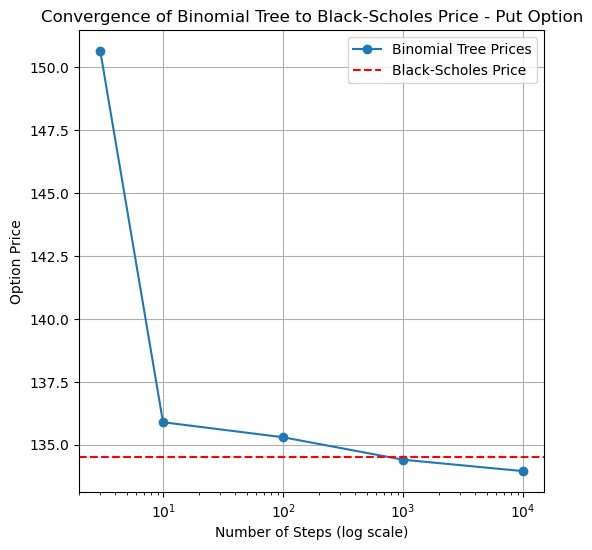

In [127]:
# Example usage
# Given parameters
S0 = 5648  # Initial stock price
K = 5600   # Strike price
r = 0.04   # Annual risk-free rate
T = 3 / 12  # 3 months = 0.25 years
sigma = 0.047 * np.sqrt(12)  # Annual volatility

steps =  [3, 10, 100, 1000, 10000]  # Number of steps to try

# Calculate Black-Scholes option price
bs_option_price = black_scholes(S0, K, r, T, sigma, "Put")

# Calculate binomial tree prices for different step counts
binomial_prices_put = []
for N in steps:
    u, d = calculate_u_d(N)
    stock_tree, option_tree, price = price_european_put_binomial(S0, K, r, u, d, N)
    binomial_prices_put.append(price)

# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(steps, binomial_prices_put, label="Binomial Tree Prices", marker='o')
plt.axhline(y=bs_option_price, color='r', linestyle='--', label="Black-Scholes Price")
plt.xscale('log')  # Log scale for better visualization of convergence
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Tree to Black-Scholes Price - Put Option')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
print(binomial_prices_put)
print(binomial_prices_call)

[150.65118788935806, 135.89183498116356, 135.29432608234103, 134.40123718379226, 133.94733501803128]
[254.23754152618682, 239.4592396743046, 239.21579642344344, 239.09342072666325, 239.0239196056191]


In [ ]:
import numpy as np

# Given values
S0 = 5648  # Current stock price
K = 5600   # Strike price
r = 0.04   # Risk-free interest rate
T = 3 / 12 # Time to maturity (3 months = 0.25 years)
n = 12     # Compounding frequency (monthly compounding)

# Call and put prices (assumed to be American options, though put-call parity applies to European options)
C = np.round(binomial_prices_call[0],2) # Call option price
P = np.round(binomial_prices_put[0],2)# Put option price

# Put-Call Parity: Left-hand side (C - P)
put_call_parity_lhs = np.round(C - P,2)

# Right-hand side (S0 - K * (1 + r/n)^(-nT)) using discrete compounding
put_call_parity_rhs = np.round(S0 - K * (1 + r / n) ** (-n * T),2)

# Print the results
print(f"Left-hand side (C - P): {put_call_parity_lhs}")
print(f"Right-hand side (S0 - K * (1 + r/n)^(-nT)): {put_call_parity_rhs}")

# Check if they are approximately equal
if np.isclose(put_call_parity_lhs, put_call_parity_rhs):
    print("Put-Call Parity holds")
else:
    print("Put-Call Parity does not hold")


### Part g)

#### American Call & Put Option

In [ ]:
def price_american_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
    # Risk-neutral probabilities using discrete compounding
    R = (r * 0.25) / N  # Discrete rate per step
    if q_u is None:  # Risk-neutral probability for upward move
        q_u = (1 + R - d) / (u - d)  
    if q_d is None:  # Risk-neutral probability for downward move
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate put option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(K - stock_tree[j, N], 0)  # Put option payoff at maturity

    # Backward induction to calculate option price at earlier nodes, allowing for early exercise
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            # Expected value from holding the option (as in the European case)
            hold_value = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)
            # Payoff from early exercise
            exercise_value = max(K - stock_tree[j, i], 0)
            # Take the maximum of holding the option vs early exercise
            option_tree[j, i] = max(hold_value, exercise_value)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0

def price_american_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
    # Risk-neutral probabilities using discrete compounding
    R = (r * 0.25) / N  # Discrete rate per step
    if q_u is None:  # Risk-neutral probability for upward move
        q_u = (1 + R - d) / (u - d)  
    if q_d is None:  # Risk-neutral probability for downward move
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate call option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(stock_tree[j, N] - K, 0)  # Call option payoff at maturity

    # Backward induction to calculate option price at earlier nodes, allowing for early exercise
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            # Expected value from holding the option (as in the European case)
            hold_value = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)
            # Payoff from early exercise
            exercise_value = max(stock_tree[j, i] - K, 0)
            # Take the maximum of holding the option vs early exercise
            option_tree[j, i] = max(hold_value, exercise_value)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0
    

In [ ]:
S0 = 5648  
K = 5600  
r = 0.04  
N = 3  
u, d = calculate_u_d(N)

# Correctly calling the American call and put option functions
stock_tree, option_tree, CA_price = price_american_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
stock_tree, option_tree, CE_price = price_european_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
stock_tree, option_tree, PE_price = price_european_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
stock_tree, option_tree, PA_price = price_american_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)

print("American Call Price:", CA_price)
print("European Call Price:", CE_price)
print("")
print("American Put Price:", PA_price)
print("European Put Price:", PE_price)